In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [3]:
import tensorboard as tb
from scipy import stats
import seaborn as sns

In [5]:
# tb.__version__

'2.13.0'

In [8]:
# from tensorflow.python.summary.summary_iterator import summary_iterator


In [57]:
# """
# code modified from this gist on github: https://gist.github.com/laszukdawid/62656cf7b34cac35b325ba21d46ecfcd
# blog post here: https://laszukdawid.com/blog/2021/01/26/parsing-tensorboard-data-locally/
# """

# def convert_tb_data(root_dir, sort_by=None):
#     """Convert local TensorBoard data into Pandas DataFrame.
    
#     Function takes the root directory path and recursively parses
#     all events data.    
#     If the `sort_by` value is provided then it will use that column
#     to sort values; typically `wall_time` or `step`.
    
#     *Note* that the whole data is converted into a DataFrame.
#     Depending on the data size this might take a while. If it takes
#     too long then narrow it to some sub-directories.
    
#     Paramters:
#         root_dir: (str) path to root dir with tensorboard data.
#         sort_by: (optional str) column name to sort by.
    
#     Returns:
#         pandas.DataFrame with [wall_time, name, step, value] columns.
    
#     """

#     def convert_tfevent(filepath):
#         return pd.DataFrame([
#             parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
#         ])

#     def parse_tfevent(tfevent):
#         return dict(
#             wall_time=tfevent.wall_time,
#             name=tfevent.summary.value[0].tag,
#             step=tfevent.step,
#             value=float(tfevent.summary.value[0].simple_value),
#         )
    
#     columns_order = ['exp_step', 'wall_time', 'name', 'step', 'value']
    
#     out = []
#     for exp_dir in os.listdir(root_dir):
#         exp_dir_path = os.path.join(root_dir, exp_dir)
#         # print(exp_dir_path)
#         # print("all: ", os.listdir(exp_dir_path))
#         filenames = list(filter(lambda x: os.path.isfile(os.path.join(exp_dir_path, x)), os.listdir(exp_dir_path)))
#         # print("filtered: ", filenames)
#         for filename in filenames:
#             # print(filename)
#             if "events.out.tfevents" not in filename:
#                 continue
#             file_full_path = os.path.join(root_dir, exp_dir, filename)
#             file_df = convert_tfevent(file_full_path)
#             file_df['exp_step'] = exp_dir
#             out.append(file_df)
#     # print(out)

#     # Concatenate (and sort) all partial individual dataframes
#     all_df = pd.concat(out)[columns_order]
#     if sort_by is not None:
#         all_df = all_df.sort_values(sort_by)
        
#     return all_df.reset_index(drop=True)



In [78]:

# dir_path = "log/coco/transpose_r_mod/osiris/exp9/"
# # exp_name = "exp9_step1_scalingBN_2024-07-30-11-22"
# exp_name = ""
# df = convert_tb_data(f"{dir_path}/{exp_name}")

# print(df)

                                   exp_step     wall_time        name  step  \
0      exp9_step1_finetune_2024-07-30-12-39  1.722343e+09  train_loss     0   
1      exp9_step1_finetune_2024-07-30-12-39  1.722343e+09   train_acc     0   
2      exp9_step1_finetune_2024-07-30-12-39  1.722343e+09  train_loss     1   
3      exp9_step1_finetune_2024-07-30-12-39  1.722343e+09   train_acc     1   
4      exp9_step1_finetune_2024-07-30-12-39  1.722343e+09  train_loss     2   
...                                     ...           ...         ...   ...   
3595  exp9_step6_scalingBN_2024-08-05-11-12  1.722857e+09   train_acc    55   
3596  exp9_step6_scalingBN_2024-08-05-11-12  1.722857e+09  train_loss    56   
3597  exp9_step6_scalingBN_2024-08-05-11-12  1.722857e+09   train_acc    56   
3598  exp9_step6_scalingBN_2024-08-05-11-12  1.722857e+09  valid_loss     2   
3599  exp9_step6_scalingBN_2024-08-05-11-12  1.722857e+09   valid_acc     2   

         value  
0     0.001312  
1     0.282913  


In [7]:
exp11_res = pd.read_csv("exp11_results.csv", index_col=0)

In [8]:
exp11_res

,exp_step,wall_time,name,step,value
0,exp11_step1_finetune_2024-08-06-16-38,1.722962e+09,train_loss,0,0.001707
1,exp11_step1_finetune_2024-08-06-16-38,1.722962e+09,train_acc,0,0.241737
2,exp11_step1_finetune_2024-08-06-16-38,1.722962e+09,train_loss,1,0.000772
3,exp11_step1_finetune_2024-08-06-16-38,1.722962e+09,train_acc,1,0.207843
4,exp11_step1_finetune_2024-08-06-16-38,1.722962e+09,train_loss,2,0.000799
...,...,...,...,...,...
3595,exp11_step6_scalingBN_2024-08-07-01-43,1.722995e+09,train_acc,55,0.467367
3596,exp11_step6_scalingBN_2024-08-07-01-43,1.722995e+09,train_loss,56,0.000498
3597,exp11_step6_scalingBN_2024-08-07-01-43,1.722995e+09,train_acc,56,0.521148
3598,exp11_step6_scalingBN_2024-08-07-01-43,1.722995e+09,valid_loss,2,0.000495


In [9]:
pd.unique(exp11_res['exp_step'])

array(['exp11_step1_finetune_2024-08-06-16-38',
       'exp11_step1_scalingBN_2024-08-06-16-24',
       'exp11_step2_finetune_2024-08-06-20-24',
       'exp11_step2_scalingBN_2024-08-06-20-12',
       'exp11_step3_finetune_2024-08-06-21-21',
       'exp11_step3_scalingBN_2024-08-06-20-58',
       'exp11_step4_finetune_2024-08-07-00-25',
       'exp11_step4_scalingBN_2024-08-07-00-15',
       'exp11_step5_finetune_2024-08-07-01-09',
       'exp11_step5_scalingBN_2024-08-07-00-58',
       'exp11_step6_finetune_2024-08-07-01-52',
       'exp11_step6_scalingBN_2024-08-07-01-43'], dtype=object)

In [10]:
pd.unique(exp11_res["name"])

array(['train_loss', 'train_acc', 'valid_loss', 'valid_acc'], dtype=object)

57
228
57
228
57
228
57
228
57
228
57
228


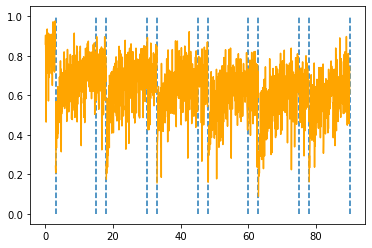

In [11]:
offset = 0
exp_num = "exp11"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp11_res[exp11_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        plt.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        plt.vlines([offset], 0,1, linestyles='dashed')


3
12
3
12
3
12
3
12
3
12
3
12


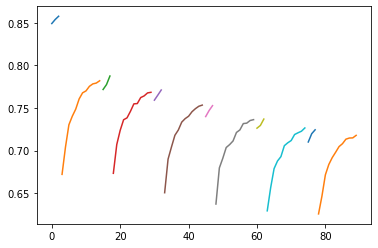

In [12]:
offset = 0
exp_num = "exp11"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp11_res[exp11_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value)
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

57
228
57
228
57
228
57
228
57
228
57
228
3
12
3
12
3
12
3
12
3
12
3
12


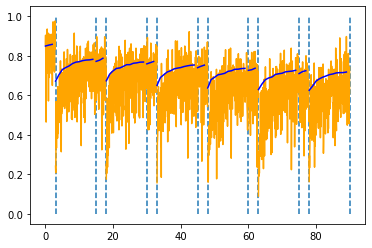

In [16]:
offset = 0
exp_num = "exp11"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp11_res[exp11_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        plt.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        plt.vlines([offset], 0,1, linestyles='dashed')


offset = 0
# exp_num = "exp9"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        val_acc = exp11_res[exp11_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        
        
        plt.plot(val_acc.step + offset, val_acc.value, color = 'blue')
        offset += len(val_acc)
        print(len(val_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

In [19]:
pd.unique(exp11_res['exp_step'])

array(['exp11_step1_finetune_2024-08-06-16-38',
       'exp11_step1_scalingBN_2024-08-06-16-24',
       'exp11_step2_finetune_2024-08-06-20-24',
       'exp11_step2_scalingBN_2024-08-06-20-12',
       'exp11_step3_finetune_2024-08-06-21-21',
       'exp11_step3_scalingBN_2024-08-06-20-58',
       'exp11_step4_finetune_2024-08-07-00-25',
       'exp11_step4_scalingBN_2024-08-07-00-15',
       'exp11_step5_finetune_2024-08-07-01-09',
       'exp11_step5_scalingBN_2024-08-07-00-58',
       'exp11_step6_finetune_2024-08-07-01-52',
       'exp11_step6_scalingBN_2024-08-07-01-43'], dtype=object)

In [45]:
exp11_val_acc = [0.75]
for step in range(1,7):
    for stage in ["finetune"]:
        val_acc = exp11_res[exp11_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        print(val_acc['value'][-1:])
        exp11_val_acc.append(val_acc['value'][-1:].to_numpy()[0])

479    0.781979
Name: value, dtype: float64
1079    0.768418
Name: value, dtype: float64
1679    0.753386
Name: value, dtype: float64
2279    0.736279
Name: value, dtype: float64
2879    0.726515
Name: value, dtype: float64
3479    0.717818
Name: value, dtype: float64


In [48]:
exp11_val_acc

[0.75,
 0.7819785475730896,
 0.7684178352355957,
 0.7533857822418213,
 0.7362790703773499,
 0.7265152335166931,
 0.7178179025650024]

In [47]:
exp11_model_size_iter = [4735825, 4298454, 4010658, 3826460, 3700224, 3625026, 3577084]

In [49]:
exp11_sparsity = []
for i in range(len(exp11_model_size_iter)):
    exp11_sparsity.append(1 - exp11_model_size_iter[i] / exp11_model_size_iter[0])


Text(0.5, 1.0, 'Performance vs Sparsity - strategy 1 and 2')

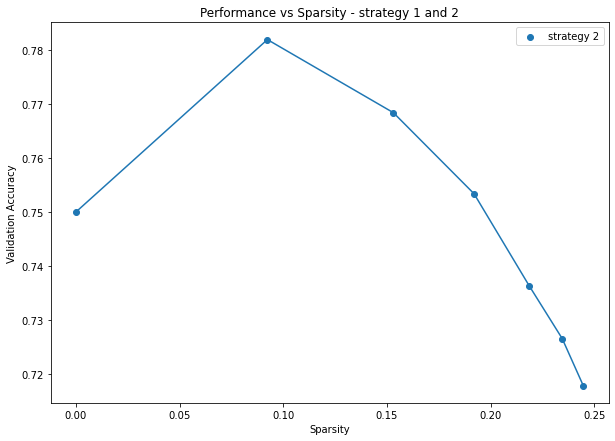

In [50]:
fig, axs = plt.subplots(figsize=(10,7))
# axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="strategy 1")
# axs.plot(exp4_sparsity, exp4_model_acc_iter)
axs.scatter(exp11_sparsity, exp11_val_acc, label="strategy 2")
axs.plot(exp11_sparsity, exp11_val_acc)
axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - strategy 1 and 2")

In [52]:
exp11_sparsity, exp11_val_acc

([0.0,
  0.09235370817122679,
  0.15312369017013927,
  0.19201828614866467,
  0.2186738319089071,
  0.2345523747182381,
  0.24467563729656394],
 [0.75,
  0.7819785475730896,
  0.7684178352355957,
  0.7533857822418213,
  0.7362790703773499,
  0.7265152335166931,
  0.7178179025650024])